### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Сатлихана Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### **Вариант** **8**
### Breast Cancer Wisconsin (Diagnostic) Data Set
### Название файла: wdbc.data
### Ссылка: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
### Класс: Outcome (столбец No 1)
### Метод отбора признаков – отбор на основе важности признаков (ExtraTreesClassifier)
### Модели классификации:
- классификатор ближайших соседей (к-во соседей = 3)
- классификатор ближайших соседей (к-во соседей = 5)
- классификатор LDA

### Кривая для визуализации - ROC-кривая






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.



In [ ]:
import pandas as pd

In [ ]:
# # Загрузка набора данных
path = '/content/drive/MyDrive/University/Viti IV/1 SEMESTER/Интеллектуальный анализ данных/Lab 5/wdbc.data'
data = pd.read_csv(path, header=None)
# Извлечение класса (Outcome)
outcome = data[1]
print("\nКласс: Outcome (столбец No 1):")
print(outcome.head())



Класс: Outcome (столбец No 1):
0    M
1    M
2    M
3    M
4    M
Name: 1, dtype: object


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс.




In [ ]:
# 1. Проверка на пропущенные значения
missing_outcome = outcome.isnull().sum()
if missing_outcome > 0:
    print(f"Обнаружено {missing_outcome} пропущенных значений. Удаление записей с пропущенными метками класса.")
    data = data.dropna(subset=[1])  # Удаляем записи с пропущенными метками класса

# 2. Проверка на уникальные классы
unique_classes = outcome.unique()
print(f"Уникальные классы: {unique_classes}")

# 3. Если классов больше двух, объединяем
if len(unique_classes) > 2:
    # Определяем мажоритарный класс
    class_counts = outcome.value_counts()
    majority_class = class_counts.idxmax()
    print(f"Мажоритарный класс: {majority_class}")

      # бинарные классы
    data[1] = data[1].apply(lambda x: 1 if x == majority_class else 0)
else:
    # Преобразование классов для бинарной классификации
    data[1] = data[1].apply(lambda x: 1 if x == 'M' else 0)

# Проверка
final_classes = data[1].value_counts()
print(f"Итоговое распределение классов:\n{final_classes}")

Уникальные классы: ['M' 'B']
Итоговое распределение классов:
1
0    357
1    212
Name: count, dtype: int64


3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.


In [ ]:
# Проверка пропущенных значений в числовых признаках
missing_values = data.isnull().sum()

# Вывод информации о пропущенных значениях
if missing_values.sum() > 0:
    print("Пропущенные значения до обработки:")
    print(missing_values)
else:
    print("Нет пропущенных значений в числовых признаках.")

Нет пропущенных значений в числовых признаках.


4. Выполните стандартизацию признаков набора данных.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Выделение числовых признаков
numerical_features = data.drop(columns=[1])  # Убираем столбец с метками классов

# Стандартизация признаков
scaler = StandardScaler()
standardized_features = scaler.fit_transform(numerical_features)

# Преобразование стандартизированных признаков обратно в DataFrame
standardized_data = pd.DataFrame(standardized_features, columns=numerical_features.columns)

# Добавление столбца с метками классов обратно
standardized_data[1] = outcome

# Вывод первых 5 строк стандартизированного набора данных
print("Первое 5 строк стандартизированного набора данных:")
print(standardized_data.head())


Первое 5 строк стандартизированного набора данных:
         0         2         3         4         5         6         7   \
0 -0.236405  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515   
1 -0.236403  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072   
2  0.431741  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926   
3  0.432121 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909   
4  0.432201  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340   

         8         9         10  ...        23        24        25        26  \
0  2.652874  2.532475  2.217515  ... -1.359293  2.303601  2.001237  1.307686   
1 -0.023846  0.548144  0.001392  ... -0.369203  1.535126  1.890489 -0.375612   
2  1.363478  2.037231  0.939685  ... -0.023974  1.347475  1.456285  0.527407   
3  1.915897  1.451707  2.867383  ...  0.133984 -0.249939 -0.550021  3.394275   
4  1.371011  1.428493 -0.009560  ... -1.466770  1.338539  1.220724  0.220556   

         27      

5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#  Выделение признаков и целевой переменной
X = standardized_data.drop(columns=[1])  # Признаки
y = standardized_data[1]                   # Целевая переменная

# Проверка количества уникальных значений в каждом признаке
unique_counts = X.nunique()
print("Количество уникальных значений в каждом признаке:")
print(unique_counts)

# Фильтрация признаков с более чем 10 уникальными значениями
filtered_features = X.loc[:, unique_counts > 10]

# Обучение модели ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(filtered_features, y)

# Получение важности признаков
importances = model.feature_importances_

# Создание DataFrame с важностью признаков
importance_df = pd.DataFrame({'Feature': filtered_features.columns, 'Importance': importances})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Важность признаков:")
print(importance_df)

# Выбор двух наиболее значимых признаков
top_features = importance_df.head(2)
print("Два наиболее значимых признака:")
print(top_features)

# Оставление только двух наиболее значимых признаков в наборе данных
selected_features = filtered_features[top_features['Feature']]
print("Набор данных с двумя наиболее значимыми признаками:")
print(selected_features.head())


Количество уникальных значений в каждом признаке:
0     569
2     456
3     479
4     522
5     539
6     474
7     537
8     537
9     542
10    432
11    499
12    540
13    519
14    533
15    528
16    547
17    541
18    533
19    507
20    498
21    545
22    457
23    511
24    514
25    544
26    411
27    529
28    539
29    492
30    500
31    535
dtype: int64
Важность признаков:
    Feature  Importance
28       29    0.109401
24       25    0.092550
23       24    0.084100
1         2    0.075066
21       22    0.067621
3         4    0.062490
4         5    0.059449
8         9    0.054458
27       28    0.052898
7         8    0.039485
26       27    0.034376
13       14    0.031162
22       23    0.027689
14       15    0.026366
2         3    0.021711
6         7    0.020548
11       12    0.019721
25       26    0.017086
29       30    0.014237
5         6    0.011722
18       19    0.010519
30       31    0.009896
17       18    0.009365
9        10    0.008974
10     

6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
selected_features = filtered_features[top_features['Feature']].copy()

# Добавляем метки классов с помощью .loc
selected_features['Class'] = standardized_data[1].values  # Добавление класса

# Перекодируем классы: 'M' -> 1 (Malignant), 'B' -> 0 (Benign)
selected_features['Class'] = selected_features['Class'].map({'M': 1, 'B': 0})

# Проверка на наличие класса после добавления
print("Формат данных selected_features после добавления и перекодировки класса:")
print(selected_features.head())

Формат данных selected_features после добавления и перекодировки класса:
         29        25  Class
0  2.296076  2.001237      1
1  1.087084  1.890489      1
2  1.955000  1.456285      1
3  2.175786 -0.550021      1
4  0.729259  1.220724      1


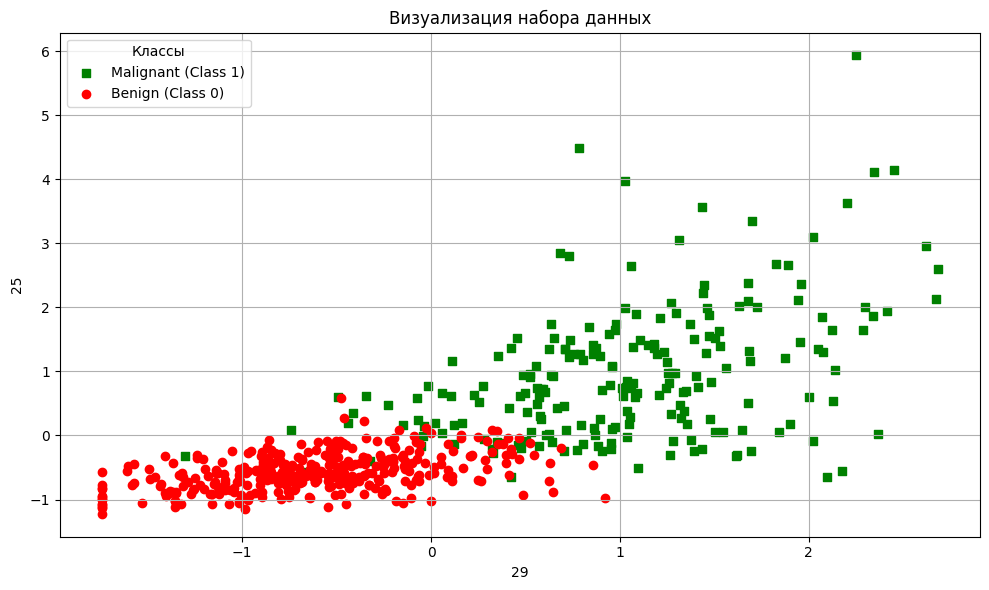

In [ ]:
# цвет и маркер для классов
colors = {0: 'red', 1: 'green'}
markers = {0: 'o', 1: 's'}  # 'o' для отрицательного класса (0 - Benign), 's' для положительного (1 - Malignant)

# Создание графика
plt.figure(figsize=(10, 6))
for class_label in selected_features['Class'].unique():
    plt.scatter(selected_features[selected_features['Class'] == class_label].iloc[:, 0],
                selected_features[selected_features['Class'] == class_label].iloc[:, 1],
                color=colors[class_label],
                marker=markers[class_label],
                label='Malignant (Class 1)' if class_label == 1 else 'Benign (Class 0)')
plt.xlabel(top_features['Feature'].iloc[0])  # Первый выбранный признак
plt.ylabel(top_features['Feature'].iloc[1])  # Второй выбранный признак
plt.title('Визуализация набора данных')
plt.legend(title='Классы')
plt.grid()
plt.tight_layout()
plt.show()

7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%.

Модели классификации:
- классификатор ближайших соседей (к-во соседей = 3)
- классификатор ближайших соседей (к-во соседей = 5)
- классификатор LDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

selected_features = filtered_features[top_features['Feature']].copy()
selected_features['Class'] = standardized_data[1].values  # Добавление класса

# Перекодируем классы: 'M' -> 1 (Malignant), 'B' -> 0 (Benign)
selected_features['Class'] = selected_features['Class'].map({'M': 1, 'B': 0})

# признаки и классы
X = selected_features.iloc[:, :-1]  # Признаки
y = selected_features['Class']  # Классы

# Печать используемых признаков
print("Используемые признаки:")
print(X.columns.tolist())  # Список названий признаков

Используемые признаки:
[29, 25]


In [ ]:
# Разделение данных на обучающую и тестовую выборки (70% на 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1. Классификатор ближайших соседей (k=3)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)

# 2. Классификатор ближайших соседей (k=5)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_knn_5 = knn_5.predict(X_test)

# 3. Классификатор LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Оценка моделей
print("KNN (k=3) Accuracy:", accuracy_score(y_test, y_pred_knn_3))
print("KNN (k=5) Accuracy:", accuracy_score(y_test, y_pred_knn_5))
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

# Подробные отчеты о классификации
print("\nClassification Report for KNN (k=3):\n", classification_report(y_test, y_pred_knn_3))
print("\nClassification Report for KNN (k=5):\n", classification_report(y_test, y_pred_knn_5))
print("\nClassification Report for LDA:\n", classification_report(y_test, y_pred_lda))

KNN (k=3) Accuracy: 0.9590643274853801
KNN (k=5) Accuracy: 0.9590643274853801
LDA Accuracy: 0.9415204678362573

Classification Report for KNN (k=3):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Classification Report for KNN (k=5):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Classification Report for LDA:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       107
           1   

8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.


In [ ]:
# функци для визуализации границ принятия решения
def plot_decision_boundaries(X, y, classifier, ax, title):
    # Создание сетки точек
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Предсказание классов для всех точек сетки
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlGn)
    for class_label in np.unique(y):
        ax.scatter(X[y == class_label].iloc[:, 0], X[y == class_label].iloc[:, 1],
                   color=colors[class_label], marker=markers[class_label],
                   label='Malignant (Class 1)' if class_label == 1 else 'Benign (Class 0)')

    ax.set_xlabel(top_features['Feature'].iloc[0])
    ax.set_ylabel(top_features['Feature'].iloc[1])
    ax.set_title(title)
    ax.legend(title='Классы')

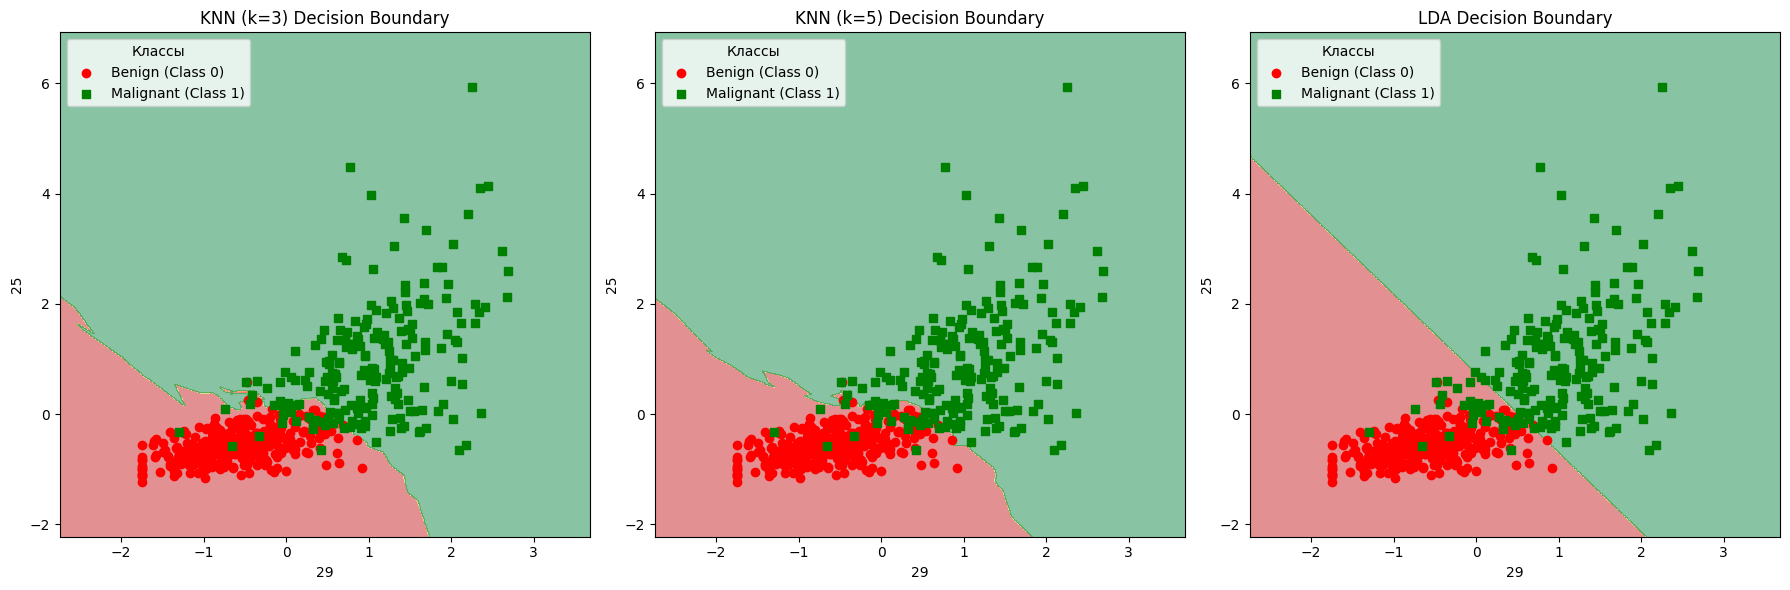

In [ ]:
# Создание фигуры для графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Визуализация для KNN (k=3)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
plot_decision_boundaries(X, y, knn_3, axes[0], 'KNN (k=3) Decision Boundary')

# 2. Визуализация для KNN (k=5)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
plot_decision_boundaries(X, y, knn_5, axes[1], 'KNN (k=5) Decision Boundary')

# 3. Визуализация для LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
plot_decision_boundaries(X, y, lda, axes[2], 'LDA Decision Boundary')

# Отображение графиков
plt.tight_layout()
plt.show()

9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.
-Кривая для визуализации - ROC-кривая

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Обучение классификаторов
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Получение предсказанных вероятностей
y_scores_knn_3 = knn_3.predict_proba(X_test)[:, 1]
y_scores_knn_5 = knn_5.predict_proba(X_test)[:, 1]
y_scores_lda = lda.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривых
fpr_knn_3, tpr_knn_3, _ = roc_curve(y_test, y_scores_knn_3)
fpr_knn_5, tpr_knn_5, _ = roc_curve(y_test, y_scores_knn_5)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_scores_lda)

# Вычисление площади под ROC-кривой (AUC)
roc_auc_knn_3 = auc(fpr_knn_3, tpr_knn_3)
roc_auc_knn_5 = auc(fpr_knn_5, tpr_knn_5)
roc_auc_lda = auc(fpr_lda, tpr_lda)

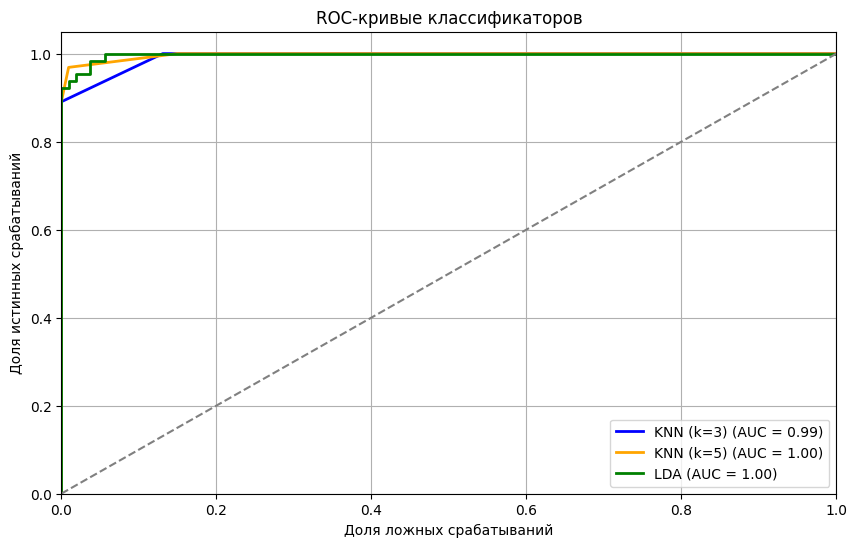

In [ ]:
# Визуализация ROC-кривых
plt.figure(figsize=(10, 6))

plt.plot(fpr_knn_3, tpr_knn_3, color='blue', lw=2, label='KNN (k=3) (AUC = {:.2f})'.format(roc_auc_knn_3))
plt.plot(fpr_knn_5, tpr_knn_5, color='orange', lw=2, label='KNN (k=5) (AUC = {:.2f})'.format(roc_auc_knn_5))
plt.plot(fpr_lda, tpr_lda, color='green', lw=2, label='LDA (AUC = {:.2f})'.format(roc_auc_lda))

# Параметры графика
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных срабатываний')  # False Positive Rate
plt.ylabel('Доля истинных срабатываний')  # True Positive Rate
plt.title('ROC-кривые классификаторов')  # ROC Curves for Classifiers
plt.legend(loc='lower right')
plt.grid()
plt.show()



10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.


In [ ]:
# Вывод AUC для каждого классификатора
print("AUC для KNN (k=3): {:.2f}".format(roc_auc_knn_3))
print("AUC для KNN (k=5): {:.2f}".format(roc_auc_knn_5))
print("AUC для LDA: {:.2f}".format(roc_auc_lda))

# Определение наилучшего классификатора
best_auc = max(roc_auc_knn_3, roc_auc_knn_5, roc_auc_lda)
if best_auc == roc_auc_knn_3:
    best_classifier = "KNN (k=3)"
elif best_auc == roc_auc_knn_5:
    best_classifier = "KNN (k=5)"
else:
    best_classifier = "LDA"

print(f"\nЛучший классификатор: {best_classifier} и Площадь под кривой = {best_auc:.2f}")


AUC для KNN (k=3): 0.99
AUC для KNN (k=5): 1.00
AUC для LDA: 1.00

Лучший классификатор: LDA и Площадь под кривой = 1.00
